# (Visual) Data Analysis

In this section, we will explore a dataset using visualization tools to get a first impression of important characteristics and relations. 

Here, we will briefly show **why getting a first visual impression** of what your data looks like is always a good idea.

## Goals
- Unterstand the difference between Data Analytics, Data Analysis and Data Science
- Learn the basics of plotting data
- Understand why visual/graphical interpretation of data is often very helpful

## What is Data Analytics? What is Data Analysis?

### What is Data Analytics?
Data Analytics is the entire process which has the goal “to make sense of data”. This comprises several steps that are necessary to extract information from data and make decisions.
Some of those steps are for example:
* Data cleaning and (pre-)processing
* Data visualization
* Data analysis
* Decision making
* …

### What is Data Analysis?
Data Analysis is the core of Data Analytics. In particular, it is the actual process of extracting information from data. This comprises the creation of models that use data to extract information and make decisions.

Models are for example:
* **Statistical models** that describe the underlying distribution from which the data is drawn (e.g., normal distributions, polynomial relationships, …).
* **Machine learning algorithms** that can be trained using the data as a training set (decision trees, …).

### What is Data Science?
Data Science is the entire field of “working with data to extract knowledge”. It comprises many different (academic) disciplines which are used jointly to “make sense of data”.

Some of those disciplines are for example:
* Computer Science / Informatics
* Statistics
* Mathematics
* Machine Learning

Remark: Almost always, domain knowledge is necessary! You need to know “what’s inside the data”!


## Example for Visual Data Analysis

First, as always, we import our libraries and load a dataset that was introduced to highlight some very particular effects:  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# new:
from sklearn.linear_model import LinearRegression # this is a model for a linear regression, we'Ll learn more about that later
import warnings # we will ignore interpreter outputs that are warnings only (error messages will still be shown)
warnings.filterwarnings("ignore")

Here, we load a dataset which is included in one of our libraries.

In [2]:
sns.load_dataset?
# pd.read_csv('FILENAME.csv')

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr

In [3]:
anscombe = sns.load_dataset("anscombe")

The dataset comprises data in four subgroups (`I` to `IV`) and looks as follows:

In [4]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


This does not give us very much information: We can see that each entry has an `x` and a `y` value, but we cannot really infer more information. 

Therefore, let's look at the different subsets in detail:

In [5]:
anscombe['dataset']=='I'

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
Name: dataset, dtype: bool

---
### &#x270d; Exercise 

Write a command that creates a new data frame that includes only the rows above where `dataset` is `I`.

Then, `describe` the result.

In [6]:
# YOUR CODE HERE

# the following command selects all rows for which the statement 'dataset' is equal to 'I' is True
# put simply, it filters for I only, dropping II, III and IV
anscombe1 = anscombe[anscombe['dataset']=='I']
anscombe1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [7]:
anscombe1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


---
### &#x270d; Exercise (continued)

Repeat this for the remaining groups! What do you notice?

In [8]:
# YOUR CODE HERE
anscombe2 = anscombe[anscombe['dataset']=='II']
anscombe2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


---


### Visual analysis

Let's confirm using a visual representation. To do so, we will plot `x` and `y` values such that all groups are differentiated by charts in different columns:

First, we will create a plot that shows the entire dataset: 

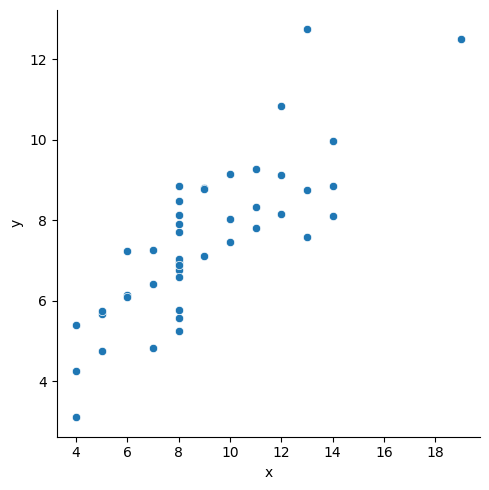

In [9]:
sns.relplot(data=anscombe, x='x', y='y')

We can also plot a linear regression model:

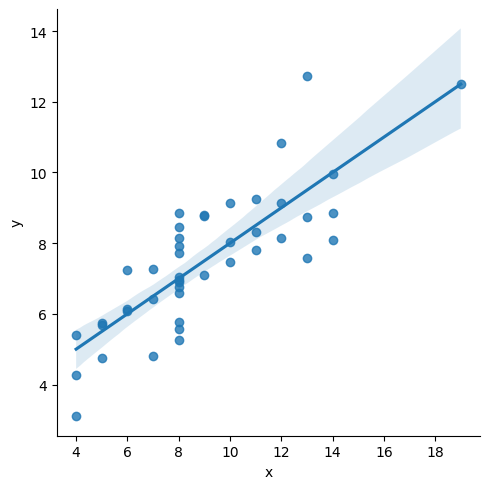

In [10]:
sns.lmplot(data=anscombe, x='x', y='y')

---
### &#x270d; Exercise (continued)

That is not particularly helpful. 

We have to distinguish between the four sets in our analysis.

To do this, create new plots (`relplot` and `lmplot`) where you use the `dataset` feature for defining different colors and columns in subfigures. 


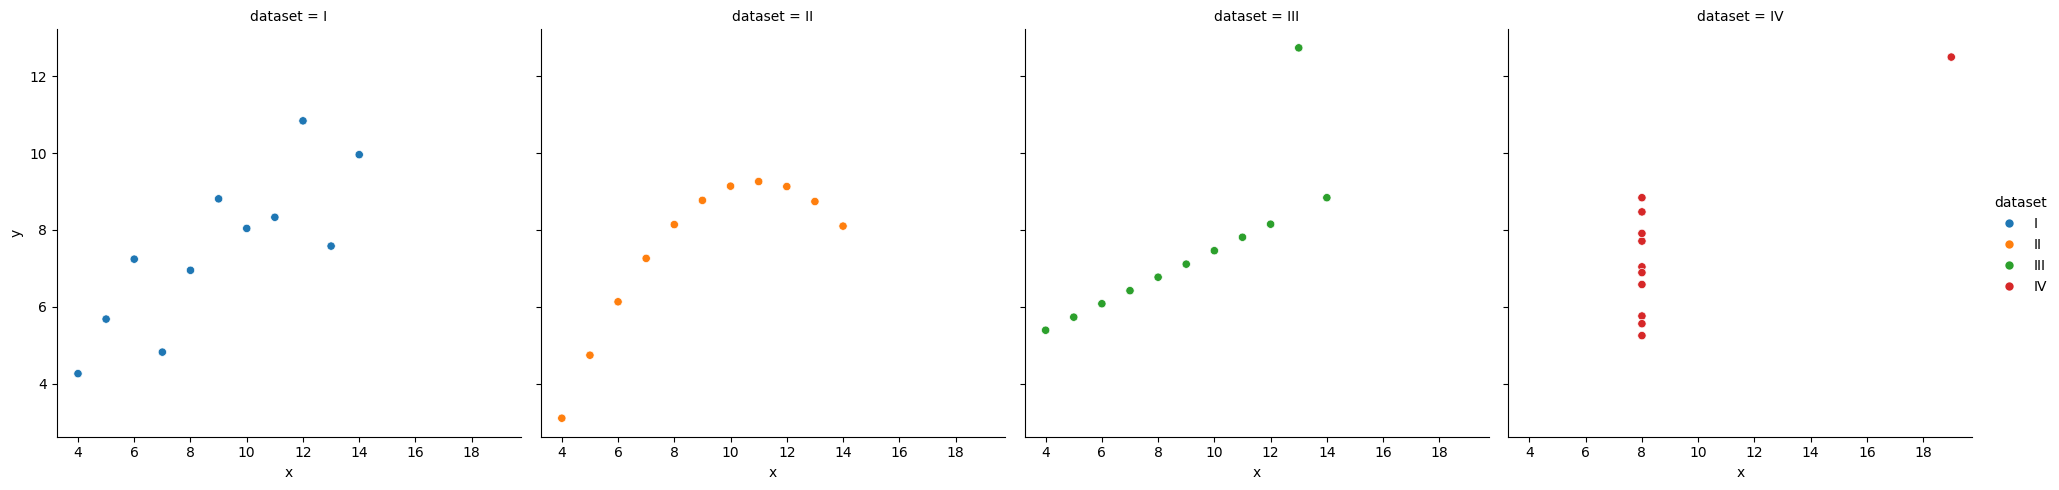

In [11]:
# YOUR CODE HERE (relplot)
sns.relplot(data=anscombe, x='x', y='y', hue='dataset', col='dataset')

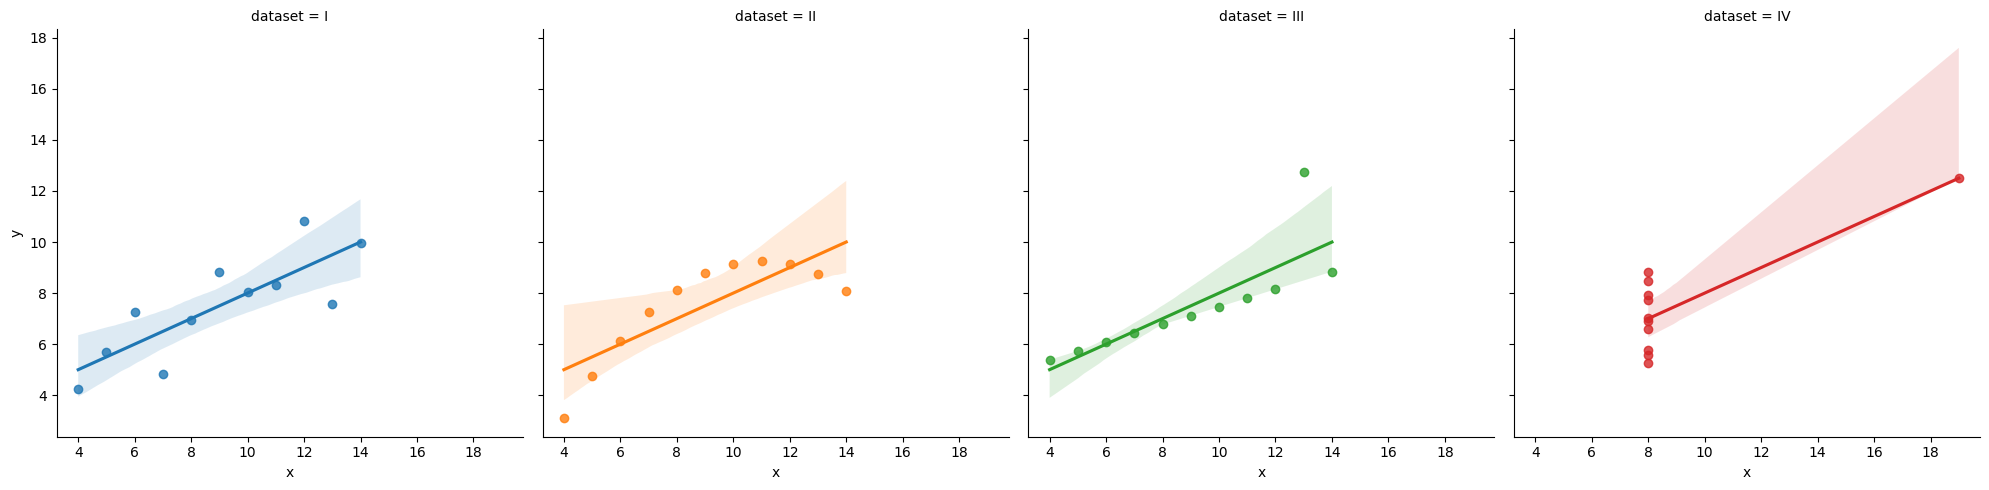

In [12]:
# YOUR CODE HERE (lmplot)
sns.lmplot(data=anscombe, x='x', y='y', col='dataset', hue='dataset')

---

As you can see, seaborn assumes that the data can be represented by basically the same linear regression model... That can't be right.

Would you have expected this behavior? 

Of course, the dataset has been designed specifically to highlight this particular problem of interpreting data. (Check out https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In practice, effects such as this one are usually not as pronounced. Still, for analysing a new dataset, we typically follow an approach such as follows:

1. Identify your main questions
2. Obtain / collect the necessary data
3. Clean and filter data
4. Visualize the data
5. Choose tools and models for detailed analysis
6. Analyse your dataset and answer your question - if necessary, repeat the previous steps
7. Interpret and report results

We will do this using an example dataset in the next step in this course!

## Bonus: Usually, there's more than one way to do things in Python...

Bonus: We used `anscombe[anscombe['dataset']=='I']` to extract data from our DataFrame. You should remember this from our basic numpy examples.

Pandas provides another way of selecting data from a DataFrame:

In [13]:
anscombe.query('dataset == "I"')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Here, we use a `query` (like in a database) which describes the "filter" as a string. Note: We need both '' (for the string) and "" (for the string inside the query string)!

Often, there is more than one way to achieve what you're trying to do in Python. Feel free to try out different ways and use the ones which feel most intuitive for you.

In [14]:
anscombe.query?

Signature: anscombe.query(expr: 'str', *, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None'
Docstring:
Query the columns of a DataFrame with a boolean expression.

Parameters
----------
expr : str
    The query string to evaluate.

    You can refer to variables
    in the environment by prefixing them with an '@' character like
    ``@a + b``.

    You can refer to column names that are not valid Python variable names
    by surrounding them in backticks. Thus, column names containing spaces
    or punctuations (besides underscores) or starting with digits must be
    surrounded by backticks. (For example, a column named "Area (cm^2)" would
    be referenced as ```Area (cm^2)```). Column names which are Python keywords
    (like "list", "for", "import", etc) cannot be used.

    For example, if one of your columns is called ``a a`` and you want
    to sum it with ``b``, your query should be ```a a` + b``.

inplace : bool
    Whether to modify the DataFrame rather than creating 

In [15]:
# Some queries can be quite helpful/powerful!
# Now try to query all x-values which are greater than 10:
anscombe.query('x > y')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
8,I,12.0,10.84
9,I,7.0,4.82
11,II,10.0,9.14
13,II,13.0,8.74


In the next chapter, we'll dive into our first real world example using scientific data!